In [ ]:
import torch
import torch.nn.functional as F
import numpy as np
import matplotlib.pyplot as plt
from torch.autograd import Variable
from tqdm import tqdm

In [ ]:
x1 = torch.rand((10000, 96))
x2 = torch.rand((10000, 96))
w_true1 = (torch.rand(96) - 0.5) * 10
w_true2 = (torch.rand(96) - 0.5) * 10
y1 = torch.sigmoid(x1.mv(w_true1)) + torch.normal(0, 1, (10000,))
y2 = torch.sigmoid(x2.mv(w_true2)) + torch.normal(0, 1, (10000,))
# y = (torch.randint(0, 2, (10000,)).float() - 0.5) * 2

In [ ]:
w_hat1 = torch.linalg.inv(x1.t().mm(x1)).mv(x1.t().mv(y1))
w_hat2 = torch.linalg.inv(x2.t().mm(x2)).mv(x2.t().mv(y2))

In [ ]:
w_dif = w_hat1 - w_hat2
s = torch.linalg.inv(x1.t().mm(x1)) + torch.linalg.inv(x2.t().mm(x2))
value = torch.linalg.inv(s).mv(w_dif).dot(w_dif)

In [ ]:
value

tensor(220.1349)

In [ ]:
from scipy import stats

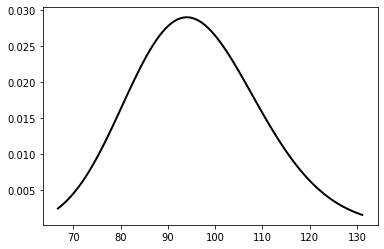

In [ ]:
df = 96
x = np.linspace(stats.chi2.ppf(0.01, df),
                stats.chi2.ppf(0.99, df), 100)
plt.plot(x, stats.chi2(df).pdf(x), 'k-', lw=2, label='frozen pdf')


In [ ]:
stats.chi2(df).cdf(value)

0.9999999999904363